# <span style="color:red"> NSL Esercitazione 9 </span>
### <span style="color:pink">  Giacomo Boringhieri 13457A</span>

Il **Traveling Salesman Problem (TSP)** è un classico problema di ottimizzazione combinatoria:  
un commesso viaggiatore deve visitare un insieme di città **una sola volta** e tornare alla città di partenza, minimizzando la distanza totale percorsa.

L'**Algoritmo Genetico (GA)** è una metaeuristica ispirata alla selezione naturale.  
Viene spesso usato per il TSP quando la ricerca esaustiva diventa impraticabile.  
Il GA funziona così:

1. **Popolazione iniziale**: un insieme di soluzioni candidate (percorsi casuali).
2. **Fitness**: valutazione della loss, qui è lunghezza del percorso, con norma $L^1$ o $L^2$.
3. **Selezione**: scelta dei "genitori" e candidati alla mutazione in base alla fitness.
4. **Crossover**: combinazione di due percorsi per generare una nuova soluzione.
5. **Mutazione**:  modifiche casuali per aumentare la diversità.
6. **Elitismo**: un candidato forte può passare invariato alla generaizone successiva
7. **Iterazione**: si ripete per divertse generazioni.

In sintesi:  
- Il TSP è difficile da risolvere in modo esatto per molte città.  
- I GA offrono una strategia **euristica** che spesso trova buone soluzioni in tempi ragionevoli.

## <span style="color:blue">  Esercizio 9.1</span>

Ogni percorso del TSP deve rispettare le seguenti regole:
- Visita ogni città una sola volta
- Ritorna al punto di partenza
- Parte dalla città madre (0)

Un tragitto del viaggiatore è esprimibiel come una sequanza 1D in un array: $[0, 1, 2, 3, ...]$ che corrisponde al tragitto che parte dalla città $0$ (come tutti i percorsi), poi prosegue alla numero 1, poi ..., fino ad arrivare all'ultima città da cui oi torna alla città di partenza

#### Algoritmi Genetici

L’obiettivo di questo esercizio è affrontare il problema del commesso viaggiatore (TSP) utilizzando un algoritmo genetico.
Si tratta di una tecnica di ottimizzazione ispirata all’evoluzione naturale, che riproduce i meccanismi di selezione, riproduzione e mutazione, portando gradualmente la popolazione di soluzioni a convergere verso quelle migliori per l’ambiente dato.

In pratica, un algoritmo genetico parte da una popolazione iniziale di N possibili soluzioni, ciascuna delle quali è valutata tramite una funzione di fitness, che misura la qualità di quell’individuo (cioè quanto bene risolve il problema).

Ad ogni iterazione, gli individui vengono ordinati in base al loro valore di fitness. I più adatti hanno una maggiore probabilità di essere scelti per la riproduzione, da cui si generano nuovi candidati. Avviene anche una fase di mutazione, in cui alcune soluzioni vengono modificate in modo casuale. Questa parte è cruciale, perché permette di evitare che l’algoritmo si blocchi in un minimo locale e di esplorare più a fondo lo spazio delle possibili soluzioni.

#### Struttura del Codice

Ho strutturato il codice con le seguenti classi:

1. *Chromosome*: rappresenta un signolo percorso, posside al suo interno le funzioni per il controllo e per la mutazione
2. *Population*: rappresenta una famiglia di percorsi, contiene i metodi per l'accoppiamento tra cromosomi e per l'evoluzione della specie

#### evolution()

All'interno delle classe *Population* ho costruito due metodi per l'evoluzione.
Il primo è un metodo "classico" dove dall'esterno imposto i valori delle probabilità di mutazione, accoppiamento, elitismo.
Questo metodo funziona bene ma ha un grosso problema: è necessario fare vari tentativi per scegliere i valori corretti. 
E se la popolazione diventa tutta uguale? Ho bisogno di mutare di più per aggiungere diversità.
E se la popolazione non riesce a mantanere il minimo? Devo fare più accoppiamenti.
Ci sono troppe variabili che possono cambiare il sistema in modo diverso durante un'evoluzone.
Per questo ho pensato di aggiungere un altro meetodo evolutivo, **un metodo dinamico** che si adatta all'ambiente in maniera autonoma: se il sistema è troppo simile aumenta la mutazione, al contrario può aumentare il crossover. Se sente un buon miglioramento continua con la strategia attuale, se invece il sistema manca di diversità provvede mutando.
Dopo diversi tentativi con i diversi metodi ho notato che: uno scelta calibrata e sensata del primo metodo è più efficace **ma** il secondo metodo mantiene sempre diversità e non cade in minimi locali all'inzio, cosa che può accadere per il primo metodo

#### Pot

Mostro grafici con entrambi i metodi, con città disposte dentro una box 1x1 o a cerchio con raggio sempre 1. 
Per ogni configuraione di città mostro il percorso migliore, l'andamento con errore della media della migliore metà della popolazione e infine l'andamento del campione per ogni generazione (ogni 100 per semplicità visiva)

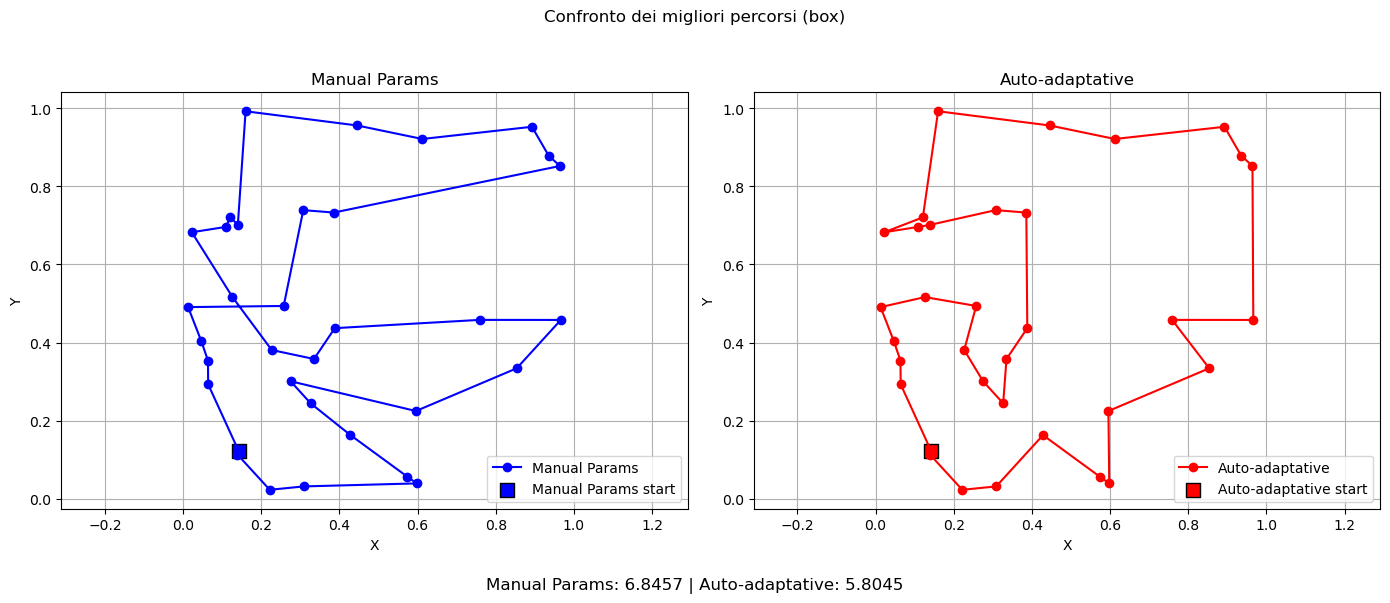

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Prefisso per scegliere facilmente tra box e circle
prefix = "box_"  # oppure "circle_"

# File da leggere
files = [prefix + "best_path_final.dat", prefix + "best_path_final_auto.dat"]
files_champions = [prefix + "champions.dat", prefix + "champions_auto.dat"]
labels = ["Manual Params", "Auto-adaptative"]
colors = ["blue", "red"]  # Colori diversi per i due percorsi

# Creo due subplot affiancati
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax, file, label, color in zip(axes, files, labels, colors):
    # Legge i dati (ogni riga: x y)
    data = np.loadtxt(file)
    x, y = data[:, 0], data[:, 1]

    # Chiude il percorso per ciclo completo
    x = np.append(x, x[0])
    y = np.append(y, y[0])

    # Traccia il percorso con linea e marker standard
    ax.plot(x, y, marker='o', color=color, label=label)

    # Evidenzia il punto di partenza con marker grande
    ax.scatter(x[0], y[0], color=color, marker='s', s=100, edgecolor='k', label=f"{label} start")

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(label)
    ax.grid(True)
    ax.axis('equal')
    ax.legend()

# ---- Lettura degli ultimi valori dai files_champions ----
champion_texts = []
for file, label, color in zip(files_champions, labels, colors):
    champions = np.loadtxt(file)
    last_value = champions[-1] if champions.ndim == 1 else champions[-1, -1]
    champion_texts.append(f"{label}: {last_value:.4f}")

# Mostra i valori sotto i grafici
fig.text(0.5, 0.02, " | ".join(champion_texts), ha="center", va="center", fontsize=12, color="black")

plt.suptitle(f"Confronto dei migliori percorsi ({prefix[:-1]})")
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

Qui ho volutamente mostrato come una scelta sbagliata dei parametri di evoluzione possa comportare gravi conseguenze nel metodo classico.

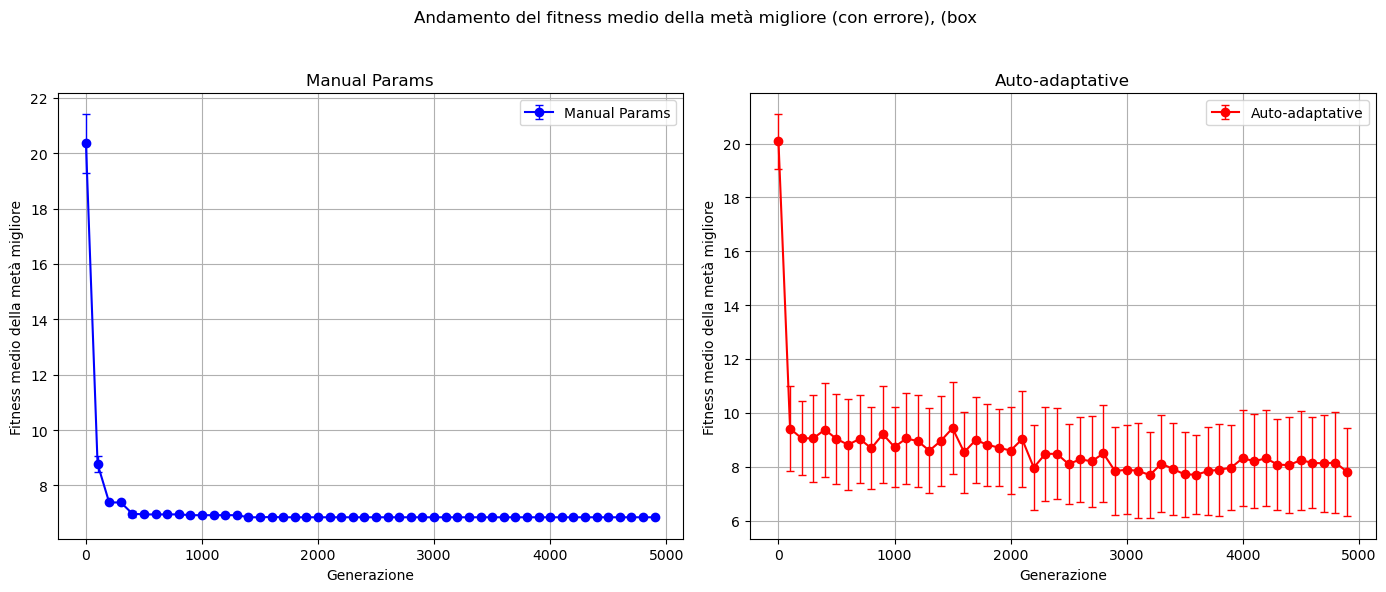

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Prefisso per scegliere facilmente tra box e circle
prefix = "box_"  # oppure "circle_"

# File da leggere
files = [prefix + "best_half.dat", prefix + "best_half_auto.dat"]
labels = ["Manual Params", "Auto-adaptative"]
colors = ["blue", "red"]  # Colori diversi per i due percorsi

# Creo due subplot affiancati
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax, file, label, color in zip(axes, files, labels, colors):
    # Legge i dati (ogni riga: i, media, errore)
    data = np.loadtxt(file)
    x = data[:, 0]         # generazione
    y = data[:, 1]         # media della metà migliore
    yerr = data[:, 2]      # errore (deviazione standard)

    # Plot con barre di errore
    ax.errorbar(x, y, yerr=yerr, fmt='-o', color=color, ecolor=color,
                elinewidth=1, capsize=3, label=label)

    ax.set_xlabel("Generazione")
    ax.set_ylabel("Fitness medio della metà migliore")
    ax.set_title(label)
    ax.grid(True)
    ax.legend()

plt.suptitle(f"Andamento del fitness medio della metà migliore (con errore), ({prefix[:-1]}")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Da notare la barra degli errori che indica la diversità genetica molto maggiore nel caso dinamico

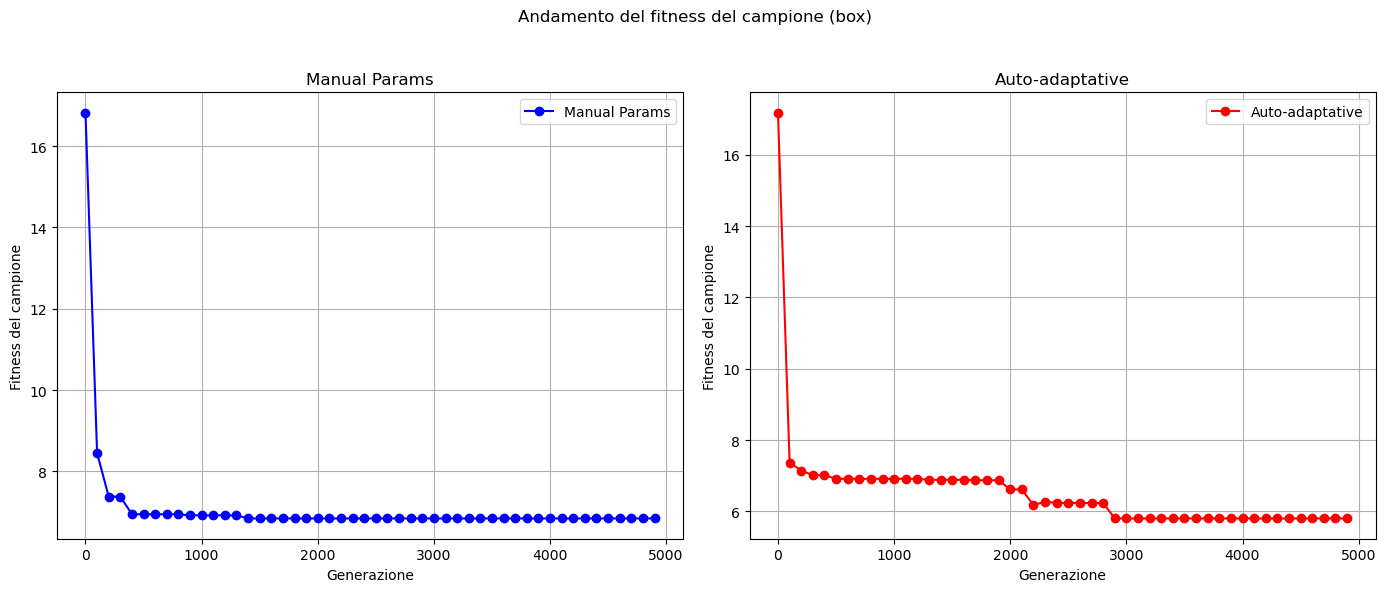

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Prefisso per scegliere facilmente tra box e circle
prefix = "box_"  # oppure "circle_"

# File da leggere
files = [prefix + "champions.dat", prefix + "champions_auto.dat"]
labels = ["Manual Params", "Auto-adaptative"]
colors = ["blue", "red"]  # Colori diversi per i due percorsi

# Creo due subplot affiancati
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax, file, label, color in zip(axes, files, labels, colors):
    # Legge i dati (ogni riga: generazione, media)
    data = np.loadtxt(file)
    x = data[:, 0]  # generazione
    y = data[:, 1]  # media della metà migliore

    # Plot semplice senza errori
    ax.plot(x, y, color=color, marker='o', label=label)

    ax.set_xlabel("Generazione")
    ax.set_ylabel("Fitness del campione")
    ax.set_title(label)
    ax.grid(True)
    ax.legend()

# Titolo generale dei due subplot
plt.suptitle(f"Andamento del fitness del campione ({prefix[:-1]})")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

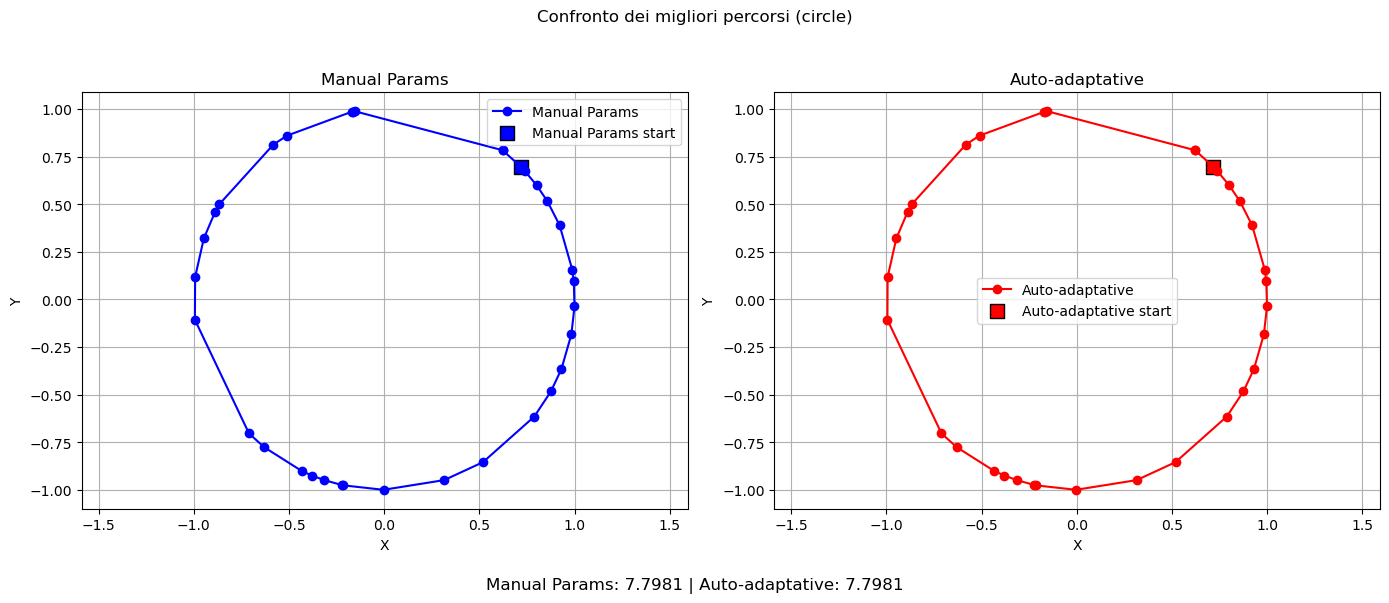

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Prefisso per scegliere facilmente tra box e circle
prefix = "circle_"  # oppure "circle_"

# File da leggere
files = [prefix + "best_path_final.dat", prefix + "best_path_final_auto.dat"]
files_champions = [prefix + "champions.dat", prefix + "champions_auto.dat"]
labels = ["Manual Params", "Auto-adaptative"]
colors = ["blue", "red"]  # Colori diversi per i due percorsi

# Creo due subplot affiancati
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax, file, label, color in zip(axes, files, labels, colors):
    # Legge i dati (ogni riga: x y)
    data = np.loadtxt(file)
    x, y = data[:, 0], data[:, 1]

    # Chiude il percorso per ciclo completo
    x = np.append(x, x[0])
    y = np.append(y, y[0])

    # Traccia il percorso con linea e marker standard
    ax.plot(x, y, marker='o', color=color, label=label)

    # Evidenzia il punto di partenza con marker grande
    ax.scatter(x[0], y[0], color=color, marker='s', s=100, edgecolor='k', label=f"{label} start")

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(label)
    ax.grid(True)
    ax.axis('equal')
    ax.legend()

# ---- Lettura degli ultimi valori dai files_champions ----
champion_texts = []
for file, label, color in zip(files_champions, labels, colors):
    champions = np.loadtxt(file)
    last_value = champions[-1] if champions.ndim == 1 else champions[-1, -1]
    champion_texts.append(f"{label}: {last_value:.4f}")

# Mostra i valori sotto i grafici
fig.text(0.5, 0.02, " | ".join(champion_texts), ha="center", va="center", fontsize=12, color="black")

plt.suptitle(f"Confronto dei migliori percorsi ({prefix[:-1]})")
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

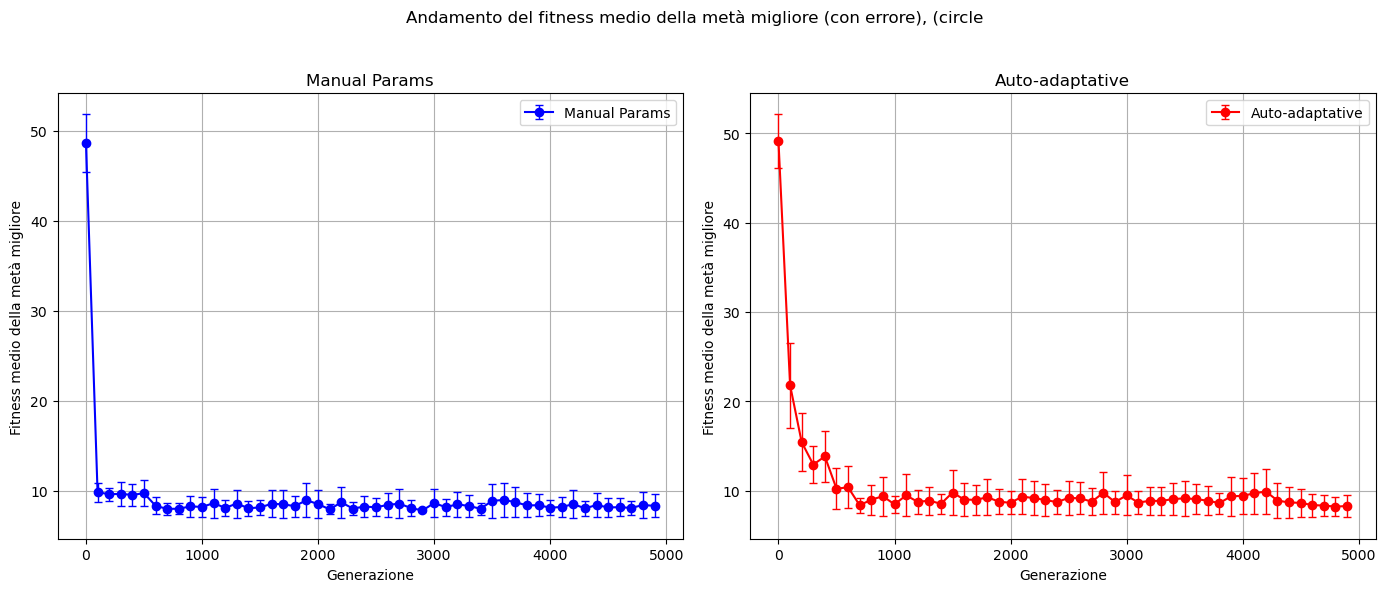

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Prefisso per scegliere facilmente tra box e circle
prefix = "circle_"  # oppure "circle_"

# File da leggere
files = [prefix + "best_half.dat", prefix + "best_half_auto.dat"]
labels = ["Manual Params", "Auto-adaptative"]
colors = ["blue", "red"]  # Colori diversi per i due percorsi

# Creo due subplot affiancati
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax, file, label, color in zip(axes, files, labels, colors):
    # Legge i dati (ogni riga: i, media, errore)
    data = np.loadtxt(file)
    x = data[:, 0]         # generazione
    y = data[:, 1]         # media della metà migliore
    yerr = data[:, 2]      # errore (deviazione standard)

    # Plot con barre di errore
    ax.errorbar(x, y, yerr=yerr, fmt='-o', color=color, ecolor=color,
                elinewidth=1, capsize=3, label=label)

    ax.set_xlabel("Generazione")
    ax.set_ylabel("Fitness medio della metà migliore")
    ax.set_title(label)
    ax.grid(True)
    ax.legend()

plt.suptitle(f"Andamento del fitness medio della metà migliore (con errore), ({prefix[:-1]}")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

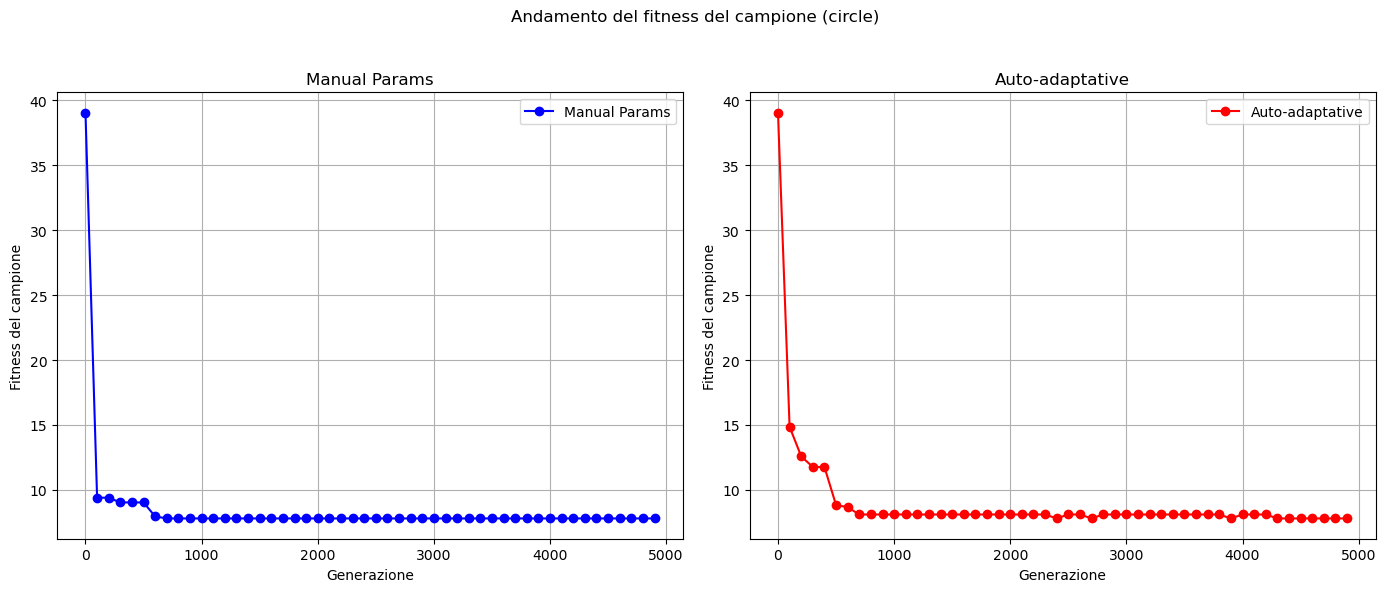

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Prefisso per scegliere facilmente tra box e circle
prefix = "circle_"  # oppure "circle_"

# File da leggere
files = [prefix + "champions.dat", prefix + "champions_auto.dat"]
labels = ["Manual Params", "Auto-adaptative"]
colors = ["blue", "red"]  # Colori diversi per i due percorsi

# Creo due subplot affiancati
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax, file, label, color in zip(axes, files, labels, colors):
    # Legge i dati (ogni riga: generazione, media)
    data = np.loadtxt(file)
    x = data[:, 0]  # generazione
    y = data[:, 1]  # media della metà migliore

    # Plot semplice senza errori
    ax.plot(x, y, color=color, marker='o', label=label)

    ax.set_xlabel("Generazione")
    ax.set_ylabel("Fitness del campione")
    ax.set_title(label)
    ax.grid(True)
    ax.legend()

# Titolo generale dei due subplot
plt.suptitle(f"Andamento del fitness del campione ({prefix[:-1]})")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In questo ultimo grafico si nota però un gran difetto del metodo dinamico.
Succede che il migliore assoluto della popolazione ha delle risalite. Questo è il prezzo della diversità genetica esagerata che ho volutamente mostrato, si può ovviare a questo problema mettendo dei vincoli più stringenti alla definizione nuemrica di *diversità grande o piccola*, che nel mio codice è:

$$
diversity = \frac{\sigma_{\mu}}{\mu}
$$

quindi è descritta dal rapporto tra l'errore della media e la media della loss della popolazione.

Si sceglie un valore sotto/sopra al quale il sistema è considerato diverso o meno

Si può ovviare a questo problema anche facendo in modo tale che i metodi di mutazione e crossing non possano prendere mai il migliore.